# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Implement

In [2]:
def minkowskiDistance(x, y, p):
    '''
    Minkowski Distance between x, y
    --------
    Return
    d: float
    '''
    d = 0
    for i in range(len(x)):
        d = d + (x[i] - y[i]) ** p
    d = d ** (1/p) 
    return d

In [3]:
class K_Means_plusplus:
    def __init__(self, n_clusters=5, max_iter=1000, tol=0.001, has_converged=False, p=2):
        ''' 
        Class constructor
        
        Parameters
        ----------
        n_clusters: int
            The number of clusters to form as well as the number of centroids to generate.
        
        max_iter: int
            Maximum number of iterations of the k-means algorithm for a single run.
        
        tol: float
            The difference in the cluster centers of two consecutive iterations to declare convergence.
            
        has_converged: boolean 
            To check if the algorithm stop or not
        
        p: int 
            type of norm
        '''
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.has_converged = has_converged
        self.p = p
    
    
    def initCentroids(self, X):
        '''
        initialized the centroids for K-means++ 
        
        Parameters
        ----------
        X : numpy array, shape (m, n)
            The matrix of inputs
        '''
        self.centroids = []
        
        # Initialize the first centroids 
        np.random.seed(0)
        self.centroids.append(X[np.random.randint(0, len(X) - 1, 1)].ravel())

        # Compute remaining centroids
        for i in range(self.n_clusters - 1):
            # List distance of each point to nearest centroids
            distance = []
            for j in range(len(X)):
                d = []
                for k in range(len(self.centroids)):
                    d.append(minkowskiDistance(X[j], self.centroids[k], self.p))
                distance.append(min(d))
            self.centroids.append(X[distance.index(max(distance))])
    
    def updateCentroids(self, cur_centroids):
        '''
        Update centrodis
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        '''
        self.has_converged=True
        for i in range(0, self.n_clusters):
            prev_centroid = self.centroids[i]
            cur_centroid  = cur_centroids[i]
            
            d = minkowskiDistance(prev_centroid, cur_centroid, self.p)
            
            #checking if % of difference between old position and new position is more than thresold
            if d > self.tol:
                self.has_converged = False
                self.centroids = cur_centroids
                
    def fit(self, X):
        '''
        Compute k-means clustering.
        
        Parameters
        ----------
        X : numpy array, shape (m, n)
            The matrix of inputs
        '''
        self.initCentroids(X)
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(self.n_clusters):
                #List samples of current cluster
                samples = []
                
                for j in range(len(X)):
                    d_list = []
                    for k in range(self.n_clusters):
                        d_list.append(minkowskiDistance(self.centroids[k], X[j], self.p))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[j])   
                
                #The centroids of each cluster is a data point within that cluster such that the total distance from the points in the cluster to it is minimal. 
                new_centroid = sum(samples) / len(samples)
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)              
        
    def predict(self, X):
        '''
        Predict using the K-means++.
        
        Parameters
        ----------
        X : numpy array, shape (m, n)
        The matrix of inputs
        
        Return
        ----------
        Returns predicted values.
        '''

        y_pred = []
        for i in range(len(X)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):               
                # Calculate distances between current data sample and centroid
                # Store to d_list
                d_list.append(minkowskiDistance(self.centroids[j], X[i], self.p))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            y_pred.append(d_list.index(min(d_list)))
        return np.array(y_pred)

In [4]:
def standardScaler(X):
    return (X - np.mean(X)) / np.std(X)

# Test

In [5]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [6]:
def calculate_WSS(X, k):
    '''
    Calculate the Within-Cluster-Sum of Squared Errors
    '''
    # Sum of square error
    sse = []
    for k in range(1, k+1):
        model = K_Means_plusplus(n_clusters=k)
        model.fit(X)
        centroids = model.centroids
        pred_clusters = model.predict(X)
        curr_sse = 0
    
        # Calculate square of distance of each point from its cluster center and add to current WSS
        for i in range(len(X)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += minkowskiDistance(X[i], curr_center, model.p) ** 2

        sse.append(curr_sse)
    return sse

In [7]:
K = range(1,11)
WSS = calculate_WSS(X, K[-1])

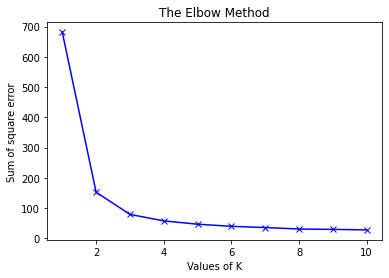

In [8]:
plt.plot(K, WSS, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Sum of square error') 
plt.title('The Elbow Method') 
plt.show() 

The Elbow method indicate k = 3 is appropriate. Dataset also has 3 values in output. 

In [9]:
model = K_Means_plusplus(n_clusters=3)

X = standardScaler(X)
model.fit(X)

y_pred = model.predict(X)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Relabel y_pred to caculate score
y_pred[y_pred==1]=3
y_pred[y_pred==2]=1
y_pred[y_pred==3]=2

In [13]:
print('Score:', np.mean(y_pred == y))

Score: 0.8933333333333333
